## This project's goal is to generate random numbers to calculate the value of pi.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import floor, log10

In [2]:
# I only want to display a few "important" numbers in the error plot.
# It gets pretty messy otherwise.
def is_important(arg):
    if arg % 200 == 0: # this condition can be changed
        return True
    else:
        return False

In [3]:
# this rounds to one sig fig
def round_to_1(x):
    answer = round(x, -int(floor(log10(abs(x)))))
    if answer >= 1:
        return int(answer)
    else:
        return answer
    
# this takes two floats and returns a string of them in standard form:
def standard_form(base, error):
    return 'Standard form: ' + '{:.{}f}'.format(base, len(str(round_to_1(error))) -2)+ ' +/- '+ str(round_to_1(error))

Final guess base value:  3.22
Standard deviation: 0.0913153581197722
Standard form: 3.22 +/- 0.09


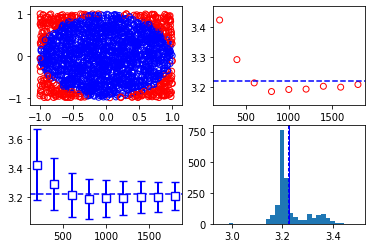

In [4]:
blue_list = [(0,0)] # initialize these two 
red_list = [(0,0)] # they must have at least one element

fig, ax = plt.subplots(2,2) # make a 2x2 grid of plots

important_x = [] # the coords that get plotted
important_y = [] # in the error and scatter plot

pis = [] # list of pi guesses for the histogram

for i in range(1, 2000):
    x, y = np.random.uniform(-1,1),np.random.uniform(-1,1)
    r = np.sqrt(x**2 + y**2)
    
    # the following is apparent from the geometry of the situation
    pi_guess= 4*len(blue_list) / (len(blue_list) +len(red_list))
    pis.append(pi_guess)
    
    # the standard deviation of the pi list for both error and histogram plots
    # I choose standard dev and not sterror because these error bars are on 
    # individual calculations of pi, rather than a mean of calculated pis
    dev = np.std(np.array(pis))
    
    if is_important(i):
        important_x.append(i)
        important_y.append(pi_guess)
        
        # we create the "third" plot first so we can get individual error bars for each plotted point
        ax[1][0].errorbar(i, pi_guess, yerr = dev, markersize=8,fmt='s',color='b',mfc='white',mec='b', 
                          elinewidth=2, capsize=4, mew=1.4)
        
    # every single point is plotted in this first scatter plot
    if r <= 1 :
        blue_list.append((x,y))
        plot_1 = ax[0][0].scatter(x,y,facecolors='none',edgecolors='b')

    else:
        red_list.append((x,y))
        plot_1 = ax[0][0].scatter(x,y,facecolors='none',edgecolors='r')
        
# the second plot:

ax[0][1].scatter(important_x, important_y, facecolors = 'none', edgecolors = 'r')
ax[0][1].axhline(y = pi_guess, color = 'b', ls = 'dashed')

# one potential problem with the above graph is that we've only plotted the "important" points...
# this graph's appearance benefits from having more points, whereas the second plot's appearance
# benefits from having fewer points. I suppose I could make another list but that seems redundant.
# Please let me know if there's an easy way to just plot 'n' points on a scatter/error plot!

# add the final guess, as a horizontal line, to plot number three:
ax[1][0].axhline(y = pi_guess, color = 'b', ls = 'dashed')

# create the fourth and final plot:
# far left and far right x value

far_left = -3 * dev + np.mean(pis)
far_right = 3 * dev + np.mean(pis)

ax[1][1].hist(pis, bins = 30, range = (far_left, far_right))

# add vertical lines for the mean of the hist +/ a standard dev
# this is the mean of the histogram, not necessarily the most accurate pi guess
ax[1][1].axvline(x=np.mean(pis),color='b',linewidth=1)
ax[1][1].axvline(x=np.mean(pis)+dev/np.sqrt(len(pis)),color='b',linewidth=1,linestyle='dashed')
ax[1][1].axvline(x=np.mean(pis)-dev/np.sqrt(len(pis)),color='b',linewidth=1,linestyle='dashed')

print('Final guess base value: ', pi_guess) # the final guess, which I presume to be the best
print('Standard deviation:',dev)
print(standard_form(pi_guess, dev))

plt.savefig('./4_plots.pdf', bbox_inches = 'tight', transparent = True)
plt.show()